In [48]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose, Reshape, Flatten
from keras.layers import Dense, Activation, ELU, BatchNormalization
import keras.backend as K
%matplotlib inline

In [38]:
(X_train_dataset, y_train_dataset), (X_test_dataset, y_test_dataset) = keras.datasets.mnist.load_data()

In [39]:
#preprocess
X_train_dataset = np.float64(X_train_dataset)
X_train_dataset = X_train_dataset.reshape(-1, 28, 28, 1)
X_train_dataset = (X_train_dataset / 255 - 0.5) * 2
X_train_dataset = np.clip(X_train_dataset, -1, 1)

X_test_dataset = preprocess(X_test)

In [ ]:
def toggle_train(m, b):
    for l in m.layers:
        l.trainable = b
        
def preprocess(x):
    x = np.float64(x)
    x = x.reshape(-1,28,28,1)
    x = 2 * (x / 255 - 0.5)
    x = np.clip(x, -1, 1)
    return x

def deprocess(x):
    x = 255 * (x / 2 + 1)
    x = np.clip(x, 0, 255)
    x = np.uint8(x)
    x = x.reshape(28, 28)
    return x

def create_gen(size, alpha):
    return Sequential([
        Dense(784, input_shape=(size, )),
        Reshape(target_shape=(7,7,16)),
        BatchNormalization(),
        ELU(alpha=alpha),
        
        Conv2DTranspose(32, kernel_size=5, strides=2, padding='same'),
        BatchNormalization(),
        ELU(alpha=alpha),
        
        Conv2DTranspose(1, kernel_size=5, strides=2, padding='same'),
        Activation('tanh')
    ])

def create_disc(alpha):
    return Sequential([
        Conv2D(32, kernel_size=5, strides=2, padding='same', input_shape=(28,28,1)),
        ELU(alpha=alpha),
        Conv2D(16, kernel_size=5, strides=2, padding='same'),
        BatchNormalization(),
        ELU(alpha=alpha),
        
        Flatten(),
        Dense(784),
        BatchNormalization(),
        ELU(alpha=alpha),
        
        Dense(1),
        Activation('sigmoid')
        
    ])

def make_Dc_GAN():
    size = 100 
    alpha = 0.2
    beta = 0.9
    gen_lr = 0.0001
    disc_lr = 0.001
    gen = create_gen(size, alpha)
    disc = create_disc(alpha)
    
    disc.compile(optimizer=Adam(lr=disc_lr, beta_1=beta), loss='binary_crossentropy')
    gan = Sequential([
        gen, disc
    ])
    gan.compile(optimizer=Adam(lr=gen_lr, beta_1=beta), loss='binary_crossentropy')
    return gan, disc, gen
    

In [ ]:
label_train_real = np.ones([128,1])
label_train_fake = np.zeros([128,1])

label_eval_real = np.ones([16,1])
label_eval_fake = np.zeros([16,1])

gan, disc, gen = make_Dc_GAN()

/Users/Kelvin/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


On Epoch: 1/100 Discriminator Loss: 15.918155670166016 Generator Loss: 1.266598985694145e-07
On Epoch: 2/100 Discriminator Loss: 16.11809539794922 Generator Loss: 16.11809539794922
On Epoch: 3/100 Discriminator Loss: 16.11809539794922 Generator Loss: 16.11809539794922
On Epoch: 4/100 Discriminator Loss: 16.11809539794922 Generator Loss: 15.09169864654541
On Epoch: 5/100 Discriminator Loss: 13.792459487915039 Generator Loss: 9.547309875488281
On Epoch: 6/100 Discriminator Loss: 5.125548362731934 Generator Loss: 9.471223831176758
On Epoch: 7/100 Discriminator Loss: 1.9049320220947266 Generator Loss: 1.702978491783142
On Epoch: 8/100 Discriminator Loss: 1.462231159210205 Generator Loss: 0.4539541006088257
On Epoch: 9/100 Discriminator Loss: 3.4967377185821533 Generator Loss: 11.792476654052734
On Epoch: 10/100 Discriminator Loss: 13.20671272277832 Generator Loss: 7.448127746582031
Images on 10 epoch


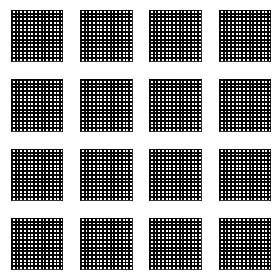

On Epoch: 11/100 Discriminator Loss: 15.11151123046875 Generator Loss: 8.449974060058594
On Epoch: 12/100 Discriminator Loss: 15.282418251037598 Generator Loss: 3.902520179748535
On Epoch: 13/100 Discriminator Loss: 16.11809539794922 Generator Loss: 15.357123374938965
On Epoch: 14/100 Discriminator Loss: 16.11809539794922 Generator Loss: 16.11809539794922
On Epoch: 15/100 Discriminator Loss: 15.584022521972656 Generator Loss: 16.11809539794922
On Epoch: 16/100 Discriminator Loss: 13.400827407836914 Generator Loss: 3.3206162452697754
On Epoch: 17/100 Discriminator Loss: 12.182379722595215 Generator Loss: 15.197529792785645
On Epoch: 18/100 Discriminator Loss: 14.203611373901367 Generator Loss: 16.11809539794922
On Epoch: 19/100 Discriminator Loss: 16.11809539794922 Generator Loss: 16.11809539794922
On Epoch: 20/100 Discriminator Loss: 16.11809539794922 Generator Loss: 16.11809539794922
Images on 20 epoch


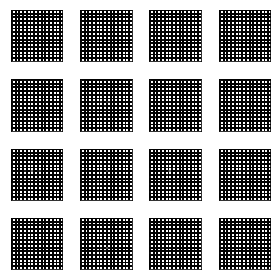

On Epoch: 21/100 Discriminator Loss: 15.519485473632812 Generator Loss: 16.11809539794922
On Epoch: 22/100 Discriminator Loss: 15.47391128540039 Generator Loss: 16.11809539794922
On Epoch: 23/100 Discriminator Loss: 16.018531799316406 Generator Loss: 16.11809539794922
On Epoch: 24/100 Discriminator Loss: 13.952472686767578 Generator Loss: 15.248090744018555
On Epoch: 25/100 Discriminator Loss: 15.180839538574219 Generator Loss: 16.11809539794922
On Epoch: 26/100 Discriminator Loss: 16.10360336303711 Generator Loss: 16.11809539794922
On Epoch: 27/100 Discriminator Loss: 15.812087059020996 Generator Loss: 4.716066360473633
On Epoch: 28/100 Discriminator Loss: 16.118154525756836 Generator Loss: 9.727941513061523
On Epoch: 29/100 Discriminator Loss: 16.11809539794922 Generator Loss: 16.11809539794922
On Epoch: 30/100 Discriminator Loss: 16.118118286132812 Generator Loss: 10.711347579956055
Images on 30 epoch


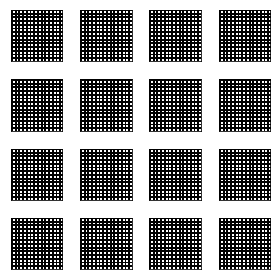

On Epoch: 31/100 Discriminator Loss: 16.11809539794922 Generator Loss: 14.427240371704102
On Epoch: 32/100 Discriminator Loss: 16.118227005004883 Generator Loss: 8.936882972717285
On Epoch: 33/100 Discriminator Loss: 11.517670631408691 Generator Loss: 1.2890242338180542
On Epoch: 34/100 Discriminator Loss: 0.3842132091522217 Generator Loss: 7.050508499145508
On Epoch: 35/100 Discriminator Loss: 2.1942694187164307 Generator Loss: 7.947999000549316
On Epoch: 36/100 Discriminator Loss: 1.4838207960128784 Generator Loss: 2.188218593597412
On Epoch: 37/100 Discriminator Loss: 0.48244738578796387 Generator Loss: 1.7424585819244385
On Epoch: 38/100 Discriminator Loss: 0.14864082634449005 Generator Loss: 2.8692615032196045
On Epoch: 39/100 Discriminator Loss: 0.44960036873817444 Generator Loss: 4.38641881942749
On Epoch: 40/100 Discriminator Loss: 0.27933159470558167 Generator Loss: 3.4516525268554688
Images on 40 epoch


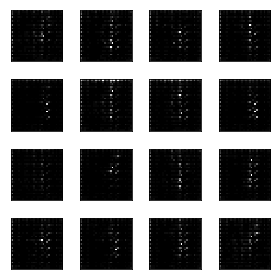

On Epoch: 41/100 Discriminator Loss: 0.5285723209381104 Generator Loss: 3.1314427852630615
On Epoch: 42/100 Discriminator Loss: 1.7165989875793457 Generator Loss: 4.757359027862549


In [ ]:
loss = []
for epochs in range(100):
    #
    for iterations in range(len(X_train_dataset)//128):
        X_batch_dataset = X_train_dataset[iterations * 128 : (iterations+1) * 128]
        #Create samples with a mean of 0 and S.D of 1
        random_set = np.random.normal(loc=0, scale=1, size=(128,100))
        X_batch_generated = gen.predict_on_batch(random_set)
        
        #Train disc
        toggle_train(disc, True)
        disc.train_on_batch(X_batch_dataset, label_train_real * (1-0.1))
        disc.train_on_batch(X_batch_generated, label_train_fake)
        
        #Train gen
        toggle_train(disc, False)
        gan.train_on_batch(random_set, label_train_real)
        
    X_eval_dataset = X_test_dataset[np.random.choice(len(X_test_dataset), 16, replace=False)]
    random_eval_set = np.random.normal(loc=0, scale=1, size=(16, 100))
    X_eval_generated = gen.predict_on_batch(random_eval_set)
    
    disc_loss = disc.test_on_batch(X_eval_dataset, label_eval_real)
    disc_loss += disc.test_on_batch(X_eval_generated, label_eval_fake)
    gan_loss = gan.test_on_batch(random_eval_set, label_eval_real)
    
    loss.append((disc_loss, gan_loss))
    
    print("On Epoch: {}/{} Discriminator Loss: {} Generator Loss: {}".format(epochs+1, 100, disc_loss, gan_loss))
    
    if (epochs+1)%10 == 0:
        print("Images on {} epoch".format(epochs+1))
        size = len(X_eval_generated)
        r = 4
        c = size//r
        plt.figure(figsize=(c, r))
        for i in range(size):
            img = deprocess(X_eval_generated[i])
            plt.subplot(r, c, i+1)
            plt.imshow(img, cmap='gray')
            plt.xticks([])
            plt.yticks([])
        plt.tight_layout()
        plt.show()
loss = np.array(loss)
fig, ax = plt.subplots()
plt.plot(losses.T[0], label='Discriminator Loss')
plt.plot(losses.T[1], label='Generator Loss')
plt.title("Train Loss")
plt.legend()
plt.show()

